In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Libraries

In [ ]:
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# One Hot Encoding

In [ ]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]])
# 0 - Tumor
# 1 - Normal

OneHotEncoder()

In [ ]:
!ls /content/drive/MyDrive/BrainTumor


Testing  Training


# Preprocessing

In [ ]:
# This cell updates result list for images with tumor
data = []
paths = []
result = []

for r, d, f in os.walk(r'/content/drive/MyDrive/BrainTumor/Training/glioma_tumor'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [ ]:
print(data)

[[[[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]]

  [[ 0  0  0]
   [ 0  0  0]
   [ 2  2  2]
   ...
   [ 2  2  2]
   [ 0  0  0]
   [ 0  0  0]]

  [[ 0  0  0]
   [ 0  0  0]
   [ 3  3  3]
   ...
   [ 2  2  2]
   [ 0  0  0]
   [ 0  0  0]]

  ...

  [[ 0  0  0]
   [ 0  0  0]
   [ 2  2  2]
   ...
   [ 3  3  3]
   [ 0  0  0]
   [ 0  0  0]]

  [[ 0  0  0]
   [ 0  0  0]
   [ 1  1  1]
   ...
   [ 1  1  1]
   [ 0  0  0]
   [ 0  0  0]]

  [[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]]]


 [[[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]]

  [[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]]

  [[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]]

  ...

  [[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]]

  [[ 0  0  0]
   [ 0  0  0]
   [ 0  0  0]
   ...
   [ 

In [ ]:
paths = []
for r, d, f in os.walk(r"/content/drive/MyDrive/BrainTumor/Training/pituitary_tumor"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))
print(paths)
for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

['/content/drive/MyDrive/BrainTumor/Training/pituitary_tumor/p (812).jpg', '/content/drive/MyDrive/BrainTumor/Training/pituitary_tumor/p (623).jpg', '/content/drive/MyDrive/BrainTumor/Training/pituitary_tumor/p (612).jpg', '/content/drive/MyDrive/BrainTumor/Training/pituitary_tumor/p (537).jpg', '/content/drive/MyDrive/BrainTumor/Training/pituitary_tumor/p (787).jpg', '/content/drive/MyDrive/BrainTumor/Training/pituitary_tumor/p (511).jpg', '/content/drive/MyDrive/BrainTumor/Training/pituitary_tumor/p (661).jpg', '/content/drive/MyDrive/BrainTumor/Training/pituitary_tumor/p (722).jpg', '/content/drive/MyDrive/BrainTumor/Training/pituitary_tumor/p (543).jpg', '/content/drive/MyDrive/BrainTumor/Training/pituitary_tumor/p (637).jpg', '/content/drive/MyDrive/BrainTumor/Training/pituitary_tumor/p (825).jpg', '/content/drive/MyDrive/BrainTumor/Training/pituitary_tumor/p (693).jpg', '/content/drive/MyDrive/BrainTumor/Training/pituitary_tumor/p (524).jpg', '/content/drive/MyDrive/BrainTumor/Tr

In [ ]:
paths = []
for r, d, f in os.walk(r"/content/drive/MyDrive/BrainTumor/Training/meningioma_tumor"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))
print(paths)
for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

['/content/drive/MyDrive/BrainTumor/Training/meningioma_tumor/m3 (91).jpg', '/content/drive/MyDrive/BrainTumor/Training/meningioma_tumor/m3 (86).jpg', '/content/drive/MyDrive/BrainTumor/Training/meningioma_tumor/m3 (89).jpg', '/content/drive/MyDrive/BrainTumor/Training/meningioma_tumor/m3 (85).jpg', '/content/drive/MyDrive/BrainTumor/Training/meningioma_tumor/m3 (90).jpg', '/content/drive/MyDrive/BrainTumor/Training/meningioma_tumor/m3 (38).jpg', '/content/drive/MyDrive/BrainTumor/Training/meningioma_tumor/m3 (96).jpg', '/content/drive/MyDrive/BrainTumor/Training/meningioma_tumor/m3 (87).jpg', '/content/drive/MyDrive/BrainTumor/Training/meningioma_tumor/m3 (97).jpg', '/content/drive/MyDrive/BrainTumor/Training/meningioma_tumor/m3 (99).jpg', '/content/drive/MyDrive/BrainTumor/Training/meningioma_tumor/m3 (41).jpg', '/content/drive/MyDrive/BrainTumor/Training/meningioma_tumor/m3 (92).jpg', '/content/drive/MyDrive/BrainTumor/Training/meningioma_tumor/m3 (131).jpg', '/content/drive/MyDrive

In [ ]:
# This cell updates result list for images without tumor

paths = []
for r, d, f in os.walk(r"/content/drive/MyDrive/BrainTumor/Training/no_tumor"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))
print(paths)
for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

['/content/drive/MyDrive/BrainTumor/Training/no_tumor/image(152).jpg', '/content/drive/MyDrive/BrainTumor/Training/no_tumor/image(299).jpg', '/content/drive/MyDrive/BrainTumor/Training/no_tumor/image(267).jpg', '/content/drive/MyDrive/BrainTumor/Training/no_tumor/image (34).jpg', '/content/drive/MyDrive/BrainTumor/Training/no_tumor/image(111).jpg', '/content/drive/MyDrive/BrainTumor/Training/no_tumor/image (52).jpg', '/content/drive/MyDrive/BrainTumor/Training/no_tumor/1.jpg', '/content/drive/MyDrive/BrainTumor/Training/no_tumor/image(42).jpg', '/content/drive/MyDrive/BrainTumor/Training/no_tumor/image(227).jpg', '/content/drive/MyDrive/BrainTumor/Training/no_tumor/image(168).jpg', '/content/drive/MyDrive/BrainTumor/Training/no_tumor/image(199).jpg', '/content/drive/MyDrive/BrainTumor/Training/no_tumor/image(19).jpg', '/content/drive/MyDrive/BrainTumor/Training/no_tumor/image (17).jpg', '/content/drive/MyDrive/BrainTumor/Training/no_tumor/image (15).jpg', '/content/drive/MyDrive/BrainT

In [ ]:
print(result)
print(len(result))

[array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1.,

In [ ]:
data = np.array(data)
data.shape

(2880, 128, 128, 3)

In [ ]:
result = np.array(result)
result = result.reshape(2880,2)

In [ ]:
result.shape

(2880, 2)

# Training vs Test Split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

# Model Building

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='adam', metrics = ['accuracy'])
print(model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 32)        │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 64)          │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      33,554,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,585,602 (128.12 MB)

 Trainable params: 33,585,410 (128.12 MB)

 Non-trainable params: 192 (768.00 B)

None


In [ ]:
y_train.shape

(2304, 2)

In [ ]:
history = model.fit(x_train, y_train, epochs = 100,verbose = 1, validation_data = (x_test, y_test))

Epoch 1/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - accuracy: 0.8042 - loss: 15.9300 - val_accuracy: 0.3576 - val_loss: 1.2069
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9189 - loss: 0.2214 - val_accuracy: 0.9028 - val_loss: 0.2426
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9285 - loss: 0.1963 - val_accuracy: 0.9497 - val_loss: 0.1571
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9496 - loss: 0.1559 - val_accuracy: 0.9271 - val_loss: 0.1449
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9535 - loss: 0.1158 - val_accuracy: 0.9323 - val_loss: 0.1648
Epoch 6/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9562 - loss: 0.1269 - val_accuracy: 0.9514 - val_loss: 0.1392
Epoch 7/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9698 - loss: 0.0664 - val_accuracy: 0.9531 - val_loss: 0.1180
Epoch 8/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9636 - loss: 0.0871 - val_accuracy:

# Plotting Graph

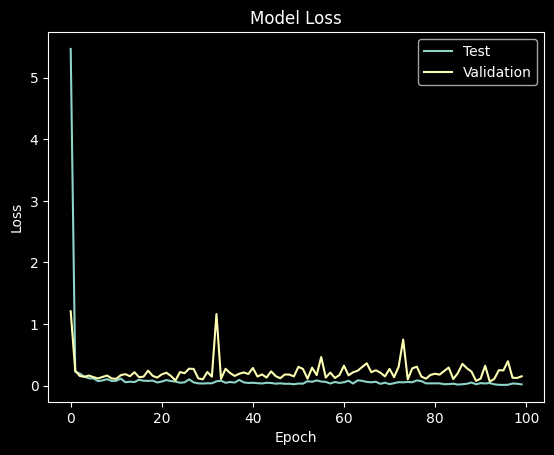

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

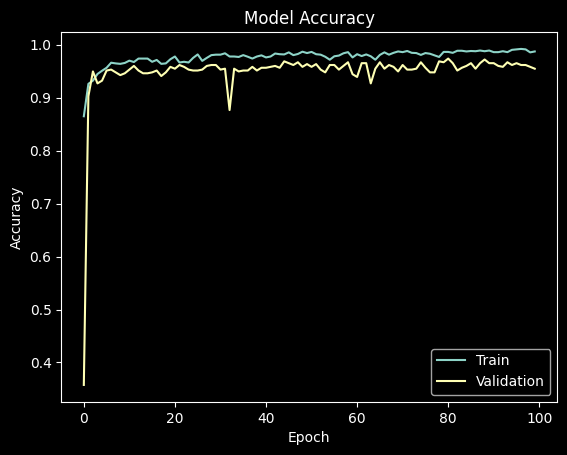

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()


# Testing

In [ ]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

57.706332206726074% Confidence This Is Its a Tumor


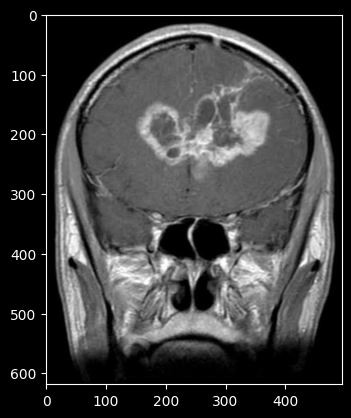

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/MyDrive/BrainTumor/Testing/glioma_tumor/image(1).jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

99.99990463256836% Confidence This Is A No, Its not a tumor


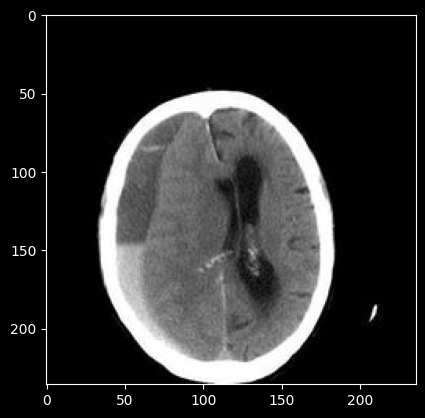

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/MyDrive/BrainTumor/Testing/no_tumor/image(1).jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))

# Classification Report

In [ ]:
from sklearn.metrics import classification_report

test_predictions = model.predict(x_test)
test_predictions = (test_predictions > 0.5).astype(int)  # Convert probabilities to binary predictions

# Generate classification report
report = classification_report(y_test, test_predictions)

# Print classification report
print(report)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test, test_predictions)
print("Accuracy: ",score)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       504
           1       0.77      0.90      0.83        72

   micro avg       0.95      0.95      0.95       576
   macro avg       0.88      0.93      0.90       576
weighted avg       0.96      0.95      0.96       576
 samples avg       0.95      0.95      0.95       576

Accuracy:  0.9548611111111112


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, test_predictions, average='weighted')
recall = recall_score(y_test, test_predictions, average='micro')
f1 = f1_score(y_test, test_predictions, average='macro')

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.9592770034843205
Recall: 0.9548611111111112
F1-score: 0.9036144578313253
